In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# librerias necesarias
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Databases/Week 7/vehicles.csv')
df.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


# Ejemplo con boston casas

In [ ]:
#importando dataset de sklearn
#para llamar el dataset se debe llamar la funcion
from sklearn.datasets import load_boston

In [ ]:
#carga la info de boston dataframe a boston_data
boston_data = load_boston()


In [ ]:
type(boston_data)
#Bunch is a Python dictionary that provides attribute-style access

sklearn.utils.Bunch

In [ ]:
boston_data

{'DESCR': ".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate p

In [ ]:
#Siempre leer la documentación al iniciar a trabajar con un dataset
#Así podremos estar seguros de que lo que usamos esta bien
print(boston_data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [ ]:
#atributos de nuestro dataset
boston_data.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [ ]:
#para trabajar en correlacion, debemos tener un DATAFRAME. 
# por ello, vamos a convertir nuestro BUNCH de datos a un dataframe
#importamos esta funcion para ello
from pandas import DataFrame

In [ ]:
#preparando los datos que van a componder el DataFrame
data = boston_data.data
columns = boston_data.feature_names

In [ ]:
#creamos la estructura de Dataframe a nuestro bunch de datos
#sin embargo, hace falta un atributo muy importante
#este es el atributo target el cual nos dice el precio

temporal = DataFrame(data, columns = columns )
temporal

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [ ]:
#guardamos el price en un dataframe para usarlo posteriormente
#por default acepta solo datos, columnas debes especificar
data_frame_target = DataFrame(boston_data.target,columns=["price"])

In [ ]:
data_frame_target.head(5)

,price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [ ]:
#unimos dataframe de precio con el de data 
#tal cual lo que hace es unir ambos dataframes en el orden de sus indices
data_frame_boston = temporal.join(data_frame_target)

In [ ]:
#columnas a minusculas
data_frame_boston.columns = data_frame_boston.columns.str.lower()

In [ ]:
data_frame_boston.head(5)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


# **Pearson**

Supuestos:
1. Muestra aleatoria: debe representar una poblacion representativa de nuestro grupo.
2. Las variables son datos continuos: Deben ser variables medidas en escala continua (temperatura, peso). 
3. Todos los datos contienen su equivalente: Deben tener su variable x y y todos nuestros regristros.
4. Son independientes: No debe haber relacion entre las variables, 
5. Son normalmente distribuidas (aprox): Deben venir de una poblacion que se acerque a una distribucion gaussiana
6. Existe una asociación lineal:
7. No tiene outliers


In [ ]:
#covarianza mide la relacion linear entre 2 variables
#valores no estandarizados
#puede ir hasta el infinito
#entre más negativo, mayor correlacion negativa y más positivo mayor correlacion positiva
#Cov en diagonal es varianza
df.cov()

,Year,Engine Displacement,Cylinders,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
Year,101.713065,0.519273,1.459896,-9.960687,7.783484,15.878169,10.556963,-266.928999,-469.934524
Engine Displacement,0.519273,1.847956,2.151927,4.796011,-4.799797,-5.726053,-5.189978,130.050228,530.429000
Cylinders,1.459896,2.151927,3.080967,5.798763,-5.892401,-6.724015,-6.269421,157.237699,692.437947
Fuel Barrels/Year,-9.960687,4.796011,5.798763,19.956615,-18.701400,-23.938899,-20.777227,524.532182,2074.962381
City MPG,7.783484,-4.799797,-5.892401,-18.701400,22.746688,25.956318,24.028256,-507.729799,-2076.084458
Highway MPG,15.878169,-5.726053,-6.724015,-23.938899,25.956318,34.702424,29.194757,-649.754558,-2542.658340
Combined MPG,10.556963,-5.189978,-6.269421,-20.777227,24.028256,29.194757,26.136725,-563.783910,-2268.286203
CO2 Emission Grams/Mile,-266.928999,130.050228,157.237699,524.532182,-507.729799,-649.754558,-563.783910,14175.467724,56185.983710
Fuel Cost/Year,-469.934524,530.429000,692.437947,2074.962381,-2076.084458,-2542.658340,-2268.286203,56185.983710,257007.049913


In [ ]:
#matriz de correlaciones
# Por default usa el coeficiente de relación de Pearson
# Mide la relación linear entre una variable X y Y, tiene valor entre 1 y -1.
# entre más positivo, mas fuerza y correlacion positiva
# entre más negativo, más fuera y correlacion negativa
# Entre un valor de 0 no hay correlacion
# La diferencia entre CORR y COV es que los valores de la CORRELACION estan estandarizados, los de la covarianza no.
#Covarianza es parte de la correlacion
# van de -1 a 1
df.corr()

,Year,Engine Displacement,Cylinders,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
Year,1.000000,0.037876,0.082469,-0.221084,0.161818,0.267259,0.204751,-0.222300,-0.091913
Engine Displacement,0.037876,1.000000,0.901858,0.789752,-0.740317,-0.715039,-0.746782,0.803520,0.769678
Cylinders,0.082469,0.901858,1.000000,0.739517,-0.703866,-0.650287,-0.698648,0.752393,0.778153
Fuel Barrels/Year,-0.221084,0.789752,0.739517,1.000000,-0.877752,-0.909664,-0.909743,0.986189,0.916208
City MPG,0.161818,-0.740317,-0.703866,-0.877752,1.000000,0.923856,0.985457,-0.894139,-0.858645
Highway MPG,0.267259,-0.715039,-0.650287,-0.909664,0.923856,1.000000,0.969392,-0.926405,-0.851404
Combined MPG,0.204751,-0.746782,-0.698648,-0.909743,0.985457,0.969392,1.000000,-0.926229,-0.875185
CO2 Emission Grams/Mile,-0.222300,0.803520,0.752393,0.986189,-0.894139,-0.926405,-0.926229,1.000000,0.930865
Fuel Cost/Year,-0.091913,0.769678,0.778153,0.916208,-0.858645,-0.851404,-0.875185,0.930865,1.000000


In [ ]:
# El desplazamiento del motor es un factor determinante en la potencia y el par 
# que produce un motor, así como en la cantidad de combustible que consume ese 
# motor. En términos generales, cuanto mayor es el desplazamiento de un motor, 
# más potencia puede generar, mientras que cuanto menor es el desplazamiento, 
# menos combustible puede consumir.
df_grouped = df.groupby('Make')[['Engine Displacement','City MPG']].mean()

In [ ]:
#Obtener la información de columna en particular como arreglo de numpy
#
x = df_grouped['Engine Displacement']
y =  df_grouped['City MPG']

In [ ]:
matplotlib.style.use('classic')#ggplot

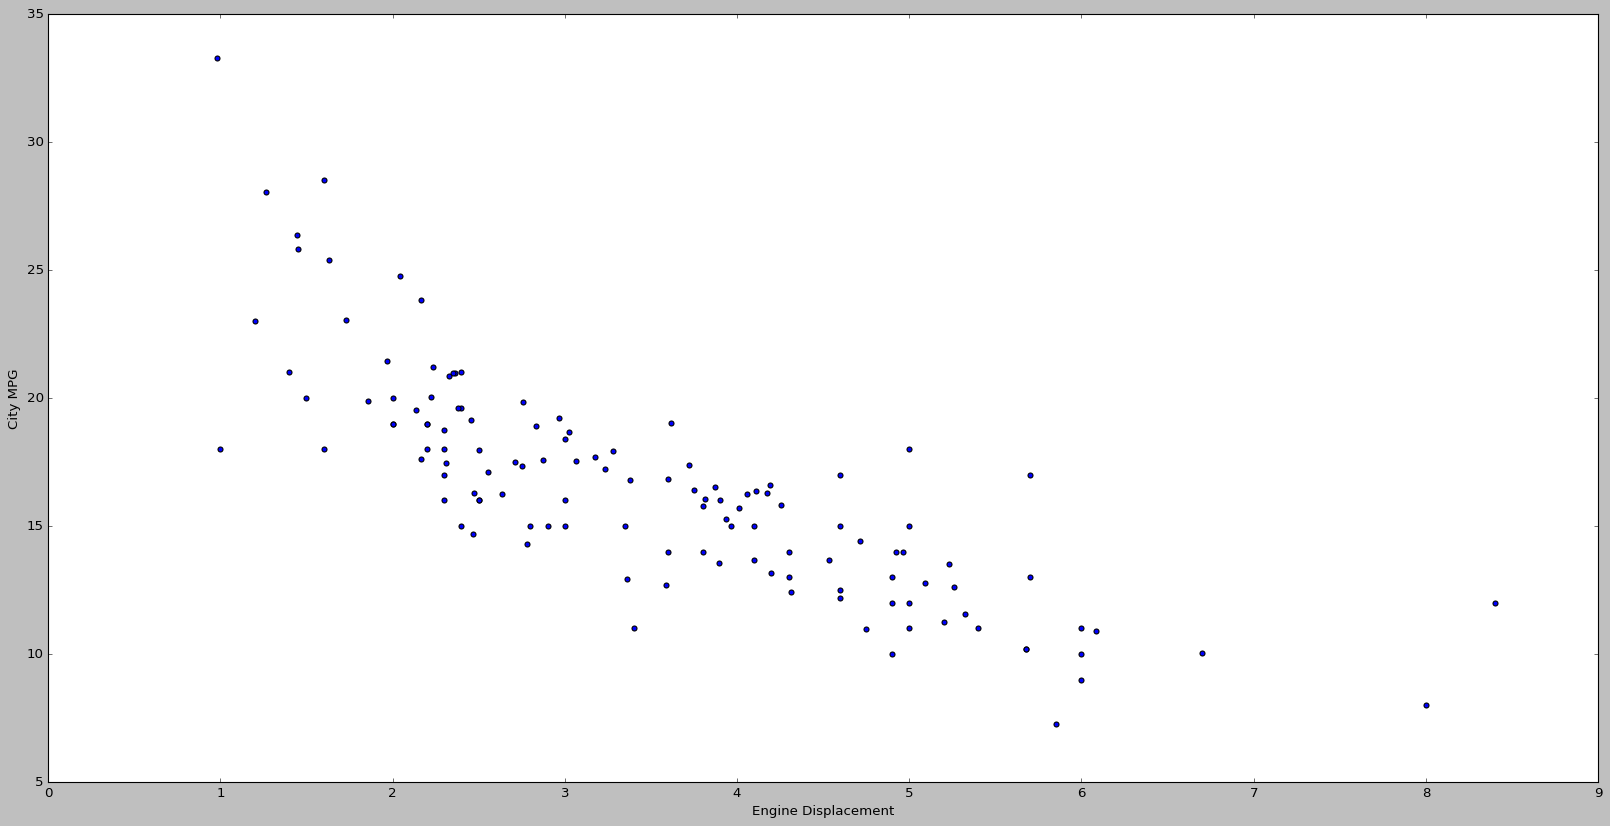

In [ ]:
# #cambiando tamaño y agregando labels
# #con esto podemos ver que la relacion es linea, no es monotonica
plt.figure(figsize=(25,12))
plt.xlabel('Engine Displacement')
plt.ylabel('City MPG')
plt.scatter(x,y)


{'whiskers': [<matplotlib.lines.Line2D object at 0x7fe54832c750>, <matplotlib.lines.Line2D object at 0x7fe547ea2690>, <matplotlib.lines.Line2D object at 0x7fe547e33450>, <matplotlib.lines.Line2D object at 0x7fe547e339d0>], 'caps': [<matplotlib.lines.Line2D object at 0x7fe547ea2bd0>, <matplotlib.lines.Line2D object at 0x7fe547eab150>, <matplotlib.lines.Line2D object at 0x7fe547e33f10>, <matplotlib.lines.Line2D object at 0x7fe547e3c450>], 'boxes': [<matplotlib.patches.PathPatch object at 0x7fe547e965d0>, <matplotlib.patches.PathPatch object at 0x7fe547eabf90>], 'medians': [<matplotlib.lines.Line2D object at 0x7fe547eab690>, <matplotlib.lines.Line2D object at 0x7fe547e3c990>], 'fliers': [<matplotlib.lines.Line2D object at 0x7fe547eabc10>, <matplotlib.lines.Line2D object at 0x7fe547e3ced0>], 'means': []}


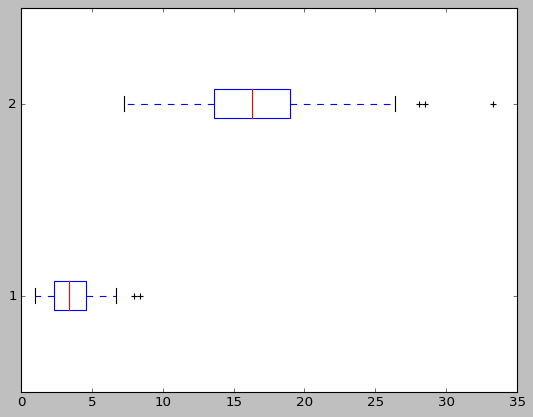

In [ ]:
# Graficando de caja
# patch_artist es para color
print(plt.boxplot([x,y],patch_artist = True, vert = 0))

In [ ]:
df_grouped

,Engine Displacement,City MPG
Make,,
AM General,3.350000,15.000000
ASC Incorporated,3.800000,14.000000
Acura,2.834768,18.890728
Alfa Romeo,2.556098,17.097561
American Motors Corporation,3.813636,16.045455
...,...,...
Volkswagen,2.236008,21.226361
Volvo,2.504742,17.981869
Wallace Environmental,4.315625,12.437500


## escaling

In [ ]:
# # Falta validar que hagamos esto normal.
# from scipy import stats
# normal = stats.norm()
# plt.plot(y, normal.pdf(y))
# plt.show()

In [ ]:
# from  sklearn.preprocessing import StandardScaler
# # Standardize features by removing the mean and scaling to unit variance
# scale=StandardScaler()
# df_grouped['Engine_Displacement_Scaler'] = scale.fit_transform(x.values.reshape(-1,1))
# df_grouped['City_MPG_Scaler'] = scale.fit_transform(y.values.reshape(-1,1))


In [ ]:
# x_scaled = df_grouped['Engine_Displacement_Scaler']
# y_scaled =  df_grouped['City_MPG_Scaler']

In [ ]:
# plt.plot(x_scaled, normal.pdf(x_scaled))
# plt.show()

# Continu4

In [ ]:
df_grouped.corr()

,Engine Displacement,City MPG
Engine Displacement,1.000000,-0.804244
City MPG,-0.804244,1.000000


In [ ]:
df_descriptive = df_grouped.describe()
df_descriptive

,Engine Displacement,City MPG
count,127.000000,127.000000
mean,3.506438,16.482247
std,1.460354,4.298447
min,0.980000,7.250000
25%,2.340712,13.618545
50%,3.350000,16.285714
75%,4.600000,18.945364
max,8.400000,33.300000


In [ ]:
q1_city = int(df_descriptive.loc[['25%'],['City MPG']].values[0])
q1_highway = int(df_descriptive.loc[['25%'],['Engine Displacement']].values[0])
q3_city = int(df_descriptive.loc[['75%'],['City MPG']].values[0])
q3_highway = int(df_descriptive.loc[['75%'],['Engine Displacement']].values[0])

In [ ]:
#Removing Outliers
#Obteniendo los percentiles 1 y 3
#OBteniendo rango intercuantil
iqr_high = q3_highway - q1_highway
iqr_city = q3_city - q1_city

#mediana es el valor que ocupa el lugar central de todos los datos cuando éstos están ordenados de menor a mayor.
#Mediana de nuestro dataset
#mediana mitad lower
#mediana  mitad upper
#Creamos nuestros limites de Outliers que son 3 veces nuestro rango intercuantil
#Esto nos ayuda a quitar todos aquellos que esten arriba de upper y debajo de
#lower
upper_high = q3_highway + (1.5*iqr_high)
upper_city = q3_city + (1.5*iqr_city)

df_clean = df_grouped[(df_grouped['Engine Displacement']<upper_high) & (df_grouped['City MPG']<upper_city)]

In [ ]:
x = df_clean['Engine Displacement']
y =  df_clean['City MPG']

{'whiskers': [<matplotlib.lines.Line2D object at 0x7fe547dfb250>, <matplotlib.lines.Line2D object at 0x7fe546b4ad50>, <matplotlib.lines.Line2D object at 0x7fe546b57bd0>, <matplotlib.lines.Line2D object at 0x7fe546b600d0>], 'caps': [<matplotlib.lines.Line2D object at 0x7fe546b502d0>, <matplotlib.lines.Line2D object at 0x7fe546b50810>, <matplotlib.lines.Line2D object at 0x7fe546b60610>, <matplotlib.lines.Line2D object at 0x7fe546b60c50>], 'boxes': [<matplotlib.patches.PathPatch object at 0x7fe546b3ecd0>, <matplotlib.patches.PathPatch object at 0x7fe546b57690>], 'medians': [<matplotlib.lines.Line2D object at 0x7fe546b50d50>, <matplotlib.lines.Line2D object at 0x7fe546aea090>], 'fliers': [<matplotlib.lines.Line2D object at 0x7fe546b57310>, <matplotlib.lines.Line2D object at 0x7fe546aea5d0>], 'means': []}


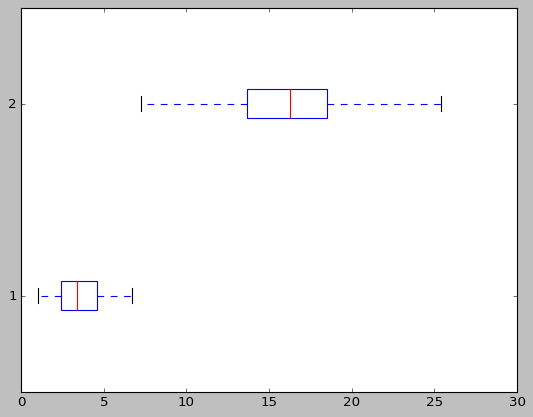

In [ ]:
print(plt.boxplot([x,y],patch_artist = True, vert = 0))

In [ ]:
len(df_clean)

120

In [ ]:
#Coeficiente de correlacion entre precio y crime.
#por default será la correlación de Pearson
#Se mide la fuerza y direccion de la covariazión lineal de dos vars
#Se usa mas cuando las variables están distribuidas normalmente
# Esto significa que x o y valor varia si el otro tambien varia, se relaciona con un cambio proporcional en las otras variables
# Por ejemplo, en este caso sería Pearson ya que a mayor % de crimen, menos costo de casa
#No tienen que estar expresados en las mismas unidades (precio, porcentaes)

df_clean[['Engine Displacement','City MPG']].corr()

,Engine Displacement,City MPG
Engine Displacement,1.000000,-0.817379
City MPG,-0.817379,1.000000


In [ ]:
df_corr = df_clean[['Engine Displacement','City MPG']].corr()
#scamos nuestra r2 la cual nos dice que 48% de la variabilidad en el precio es
#explicada pro la variabilidad en el crimen lo cual deja el otro 85% a factores 
# externos
df_corr.iloc[0][1]**2*100

66.81091083308233

In [ ]:
# Haciendo lo mismo con numpy
corr_mat = np.corrcoef(df_clean['Engine Displacement'],df_clean['City MPG'])
corr = corr_mat[0,1]
corr**2*100

66.81091083308237

In [ ]:
#Obtener la información de columna en particular como arreglo de numpy
#
Engine_Displacement = df_clean['Engine Displacement'].to_numpy()
City_MPG =  df_clean['City MPG'].to_numpy()
#item_desc = data_frame_liquors.item_description.to_numpy()


In [ ]:
#importa mos corrcoef
# este nos permite ver el coeficiente de correlacion
#obteniendo correlacion entre ventas y botellas vendidas
#en este caso es una correlación negativa, a mayor crimen,menor precio
np.corrcoef(Engine_Displacement,City_MPG)

array([[ 1.        , -0.81737942],
       [-0.81737942,  1.        ]])

In [ ]:
correlation, pval = stats.pearsonr(Engine_Displacement,City_MPG)
print(f'correlation={correlation:.6f}, p-value={pval:.60f}')

correlation=-0.817379, p-value=0.000000000000000000000000000004893279333501164354124279900717


In [ ]:
print(f'correlation={correlation:.6f}, p-value={pval:.6f}')
if pval > 0.05:
    print('At 5% level of significance, no hay correlacion entre el cilindraje y el gasto de gas')
else:
    print('At 5% level of significance,  hay correlacion entre el cilindraje y el gasto de gas')

correlation=-0.827941, p-value=0.000000
At 5% level of significance,  hay correlacion entre el cilindraje y el gasto de gas


#Spearman

Supuestos
1. Muestra aleatoria
2. Relacion monotonica
3. Por lo menos son ordinales las vriables : Las variables deben ser continuas (Temperature, Pesos, performance groups). No se puede con medidas nominales (tipo de sangre, sexo...)
4. Cada variable tiene su equivalente
5. Son observaciones independientes (depende de como se diseño el experimento, hermano/hermana)
6. No tienen que ser datos tomados de una distribucion normal


In [ ]:

from scipy.stats import rankdata
# ‘average’: The average of the ranks that would have been assigned to all the tied values is assigned to each value.
# ‘min’: The minimum of the ranks that would have been assigned to all the tied values is assigned to each value. (This is also referred to as “competition” ranking.)
# ‘max’: The maximum of the ranks that would have been assigned to all the tied values is assigned to each value.
# ‘dense’: Like ‘min’, but the rank of the next highest element is assigned the rank immediately after those assigned to the tied elements.
# ‘ordinal’: All values are given a distinct rank, corresponding to the order that the values occur in a.
df_clean['ranking_cilinder'] = rankdata(df_clean['Engine Displacement'],method='min')
df_clean['ranking_city'] = rankdata(df_clean['City MPG'],method='min')
df_clean.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Engine Displacement,City MPG,ranking_cilinder,ranking_city
Make,,,,
AM General,3.350000,15.000000,59,41
ASC Incorporated,3.800000,14.000000,70,33
Acura,2.834768,18.890728,47,93
Alfa Romeo,2.556098,17.097561,40,73
American Motors Corporation,3.813636,16.045455,71,59


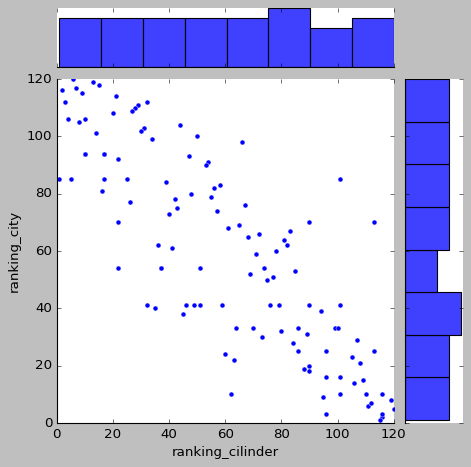

In [ ]:
import seaborn as sns 
sns.jointplot(x=df_clean['ranking_cilinder'], y=df_clean['ranking_city'])
plt.show()

In [ ]:
# Spearman evalua funciones monotonicas entre dos variables
# que esten rankeadas, por ejemplo, cuando tenemos un ranking de usuarios segun
#su nivel crediticio (donde 1 es bueno y n es peor), podemos usar Spearman ya que estos
#valores NO son continuos

# relaciones monotonicas son por ekemplo, si una de las variables sube, la otra baja
# o si una sube la otra sube tambien
# en este caso sería ver si a mayor crimen tenemos ambos casos
# que el precio suba y que el precio baje
df_grouped.corr('spearman')

,Engine Displacement,City MPG
Engine Displacement,1.000000,-0.852001
City MPG,-0.852001,1.000000


In [ ]:
df_grouped.corr(method='spearman').iloc[0,1]


-0.8520007883470272

In [ ]:
correlation, pval = stats.spearmanr(df_clean[['ranking_city','ranking_cilinder']])
print(f'correlation={correlation:.6f}, p-value={pval:.6f}')

correlation=-0.827941, p-value=0.000000


In [ ]:
#Kendall es una opción a Pearson
#Básicamente ayuda mucho cuando se trabajan con muy pocos datos
#Igual mide la fuerza y relación que tienen entre ellas

# Kendall rank correlation (non-parametric) is an alternative to Pearson's 
# correlation (parametric) when the data you're working with has failed one 
# or more assumptions of the test. This is also the best alternative to Spearman
#  correlation (non-parametric) when your sample size is small and has many tied ranks.
df_clean[['ranking_city','ranking_cilinder']].corr('kendall')

,ranking_city,ranking_cilinder
ranking_city,1.000000,-0.644401
ranking_cilinder,-0.644401,1.000000


# **Graficando lib**

In [ ]:
# Usaremos matplotlib para mostrar como se comportan neustros datos
import matplotlib

In [ ]:
x=df_clean['Engine Displacement']
y=df_clean['City MPG']


In [ ]:
#usa el estilo ggplot de R
matplotlib.style.use('classic')#ggplot

In [ ]:
# #Graficando punto x y y
# plt.scatter (x,y)

In [ ]:
# #cambiando tamaño y agregando labels
# #con esto podemos ver que la relacion es linea, no es monotonica
# plt.figure(figsize=(25,12))
# plt.xlabel('Engine Displacement')
# plt.ylabel('City MPG')
# plt.scatter(x,y)

In [ ]:
#usando seaborn para grafico de calor y ver correlaciones


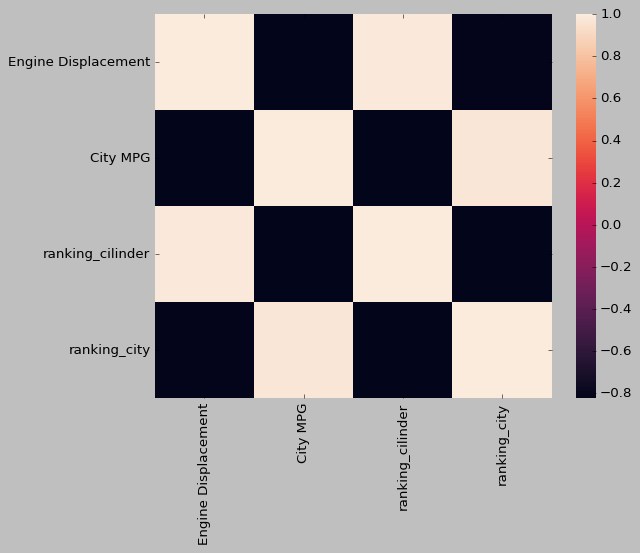

In [ ]:
sns.heatmap(df_clean.corr())

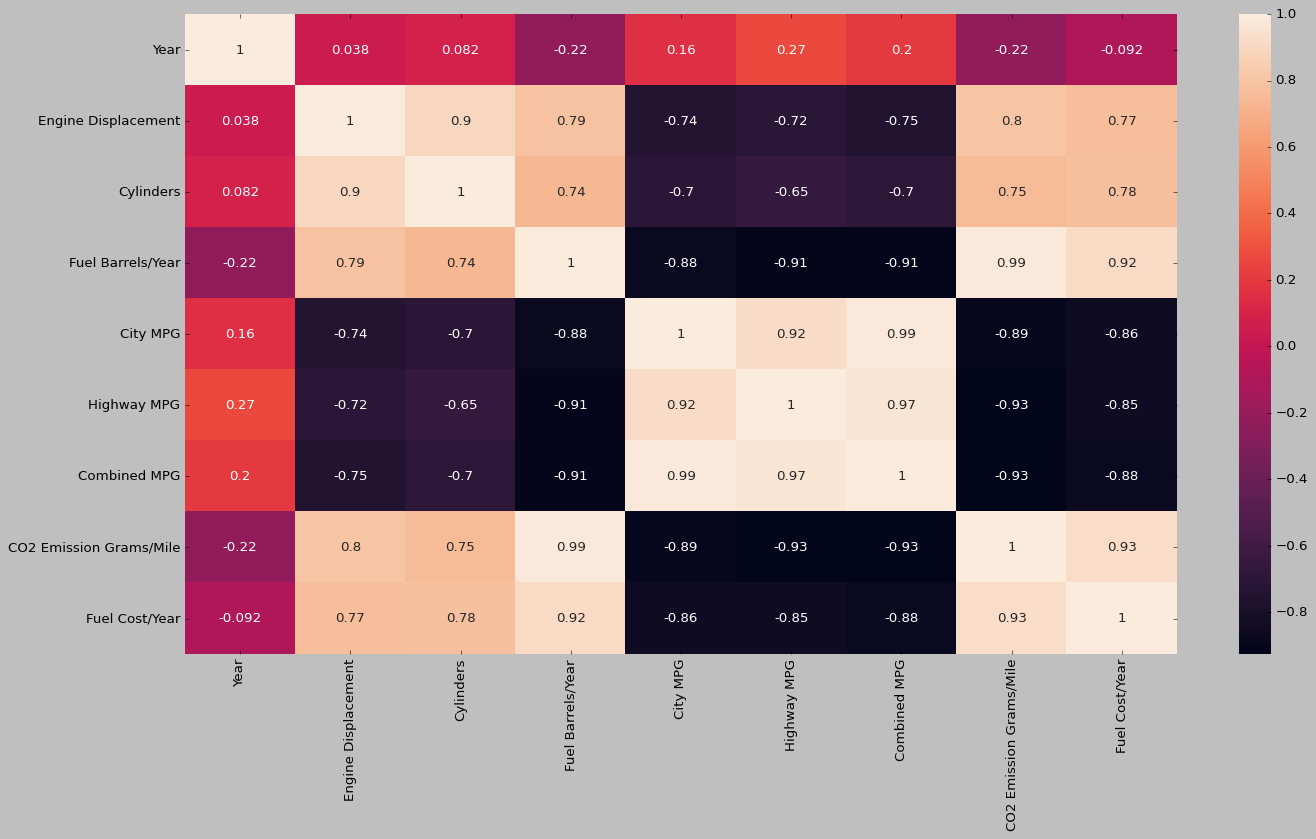

In [ ]:
#annot = True funciona para mostrar el coeficiente
# hacemos mas grade para que se vea bien
plt.subplots(figsize=(20,10))    
sns.heatmap(df.corr(),annot = True)
plt.show()

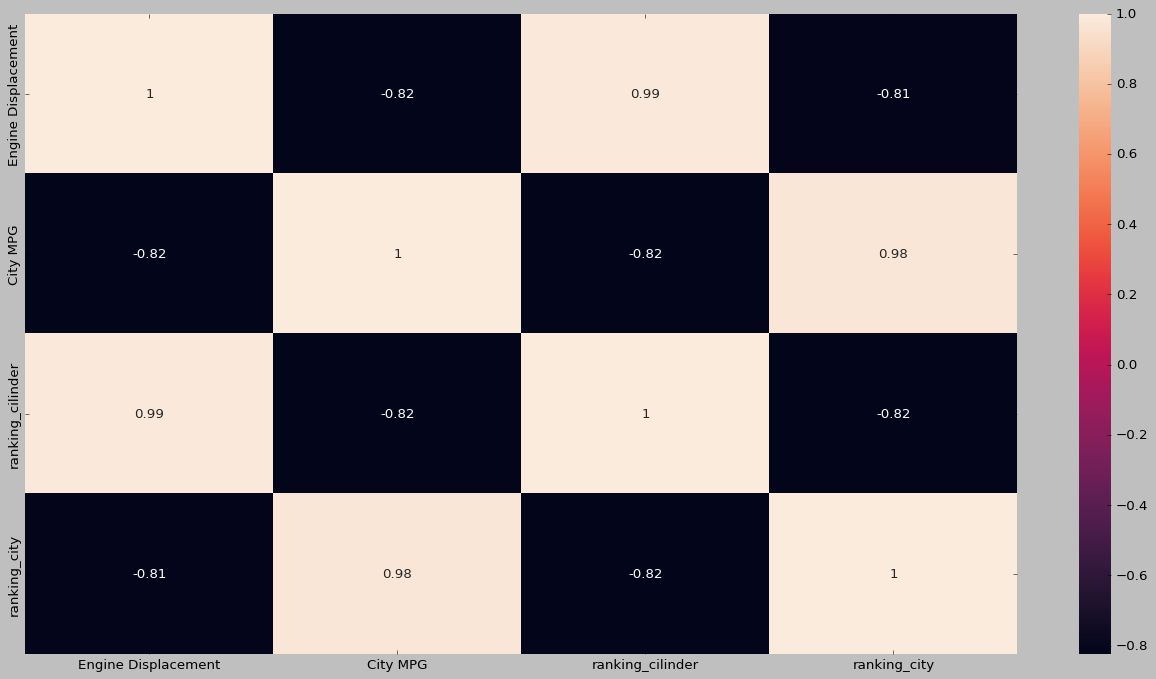

In [ ]:
#annot = True funciona para mostrar el coeficiente
# hacemos mas grade para que se vea bien
plt.subplots(figsize=(20,10))    
sns.heatmap(df_clean.corr(),annot = True)
plt.show()

In [ ]:
#Defining Correlation plot function
def correlation_plot(corr, title=""):
    # Enmascaramos con zeros
    mask = np.zeros_like(corr, dtype=np.bool)
    # Return the indices for the upper-triangle of an (n, m) array.
    mask[np.triu_indices_from(mask)] = True
    
    plt.subplots(figsize=(15, 10))

    cmap = sns.diverging_palette(6, 255, as_cmap=True)
    
    chart = sns.heatmap(corr, mask=mask, cmap=cmap, center=0, linewidths=.5, annot=True, fmt='.2f')
    plt.title(title, fontsize=16)
    return chart

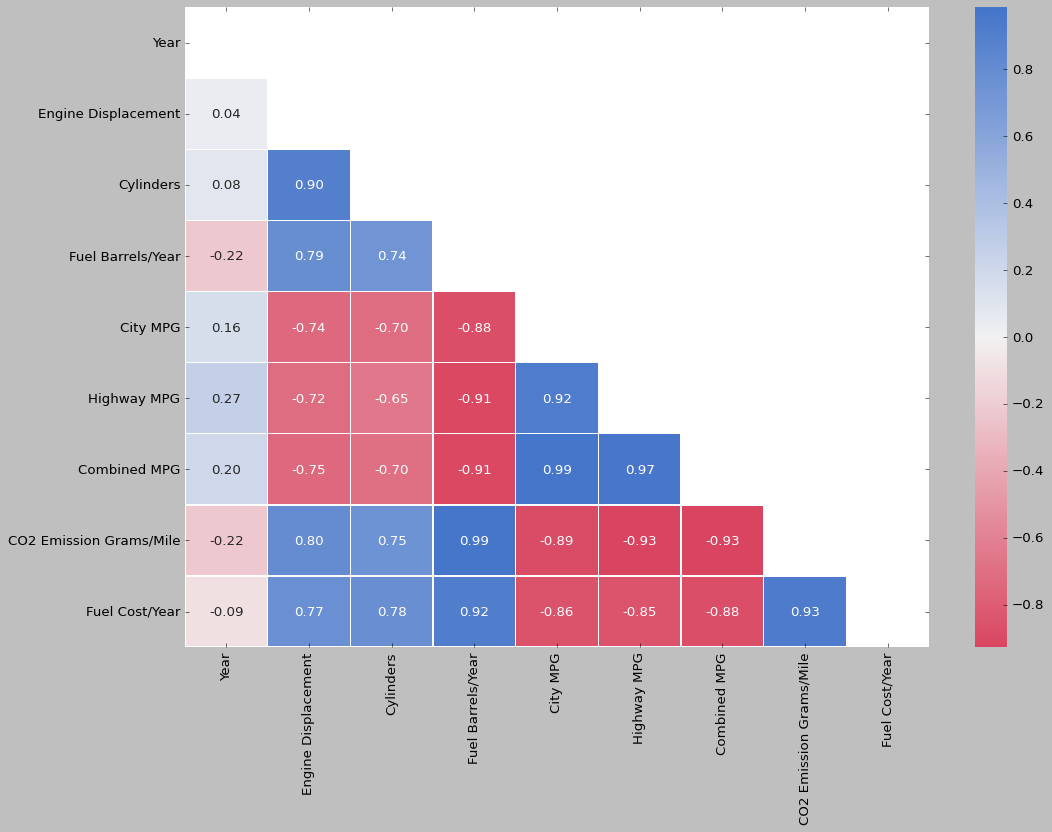

In [ ]:
    #declaramos a mask, zeros_like convierte en zeros, al poner np.bool los convierte a true, false
    mask = np.zeros_like(df.corr(), dtype=np.bool)

    #triu_indices_from regresa los valores del triangulo superior de la matriz, convertimos esos valores que son booleanos False a True
    mask[np.triu_indices_from(mask)]=True
    
    #crea una grafica vacia de tamaño 15,10
    plt.subplots(figsize=(15, 10))
    
    #asignamos una paleta de colores divergente (colores HUSL), la variable la guardamos en cmap
    cmap = sns.diverging_palette(6, 255, as_cmap=True)
  
    #usamos variables definidas arriba, mask para quitar esquina superior, cmap para formaro, fmt es para decimales
    chart = sns.heatmap(df.corr(), mask=mask, cmap=cmap, center=0, linewidths=.5, annot=True, fmt='.2f')

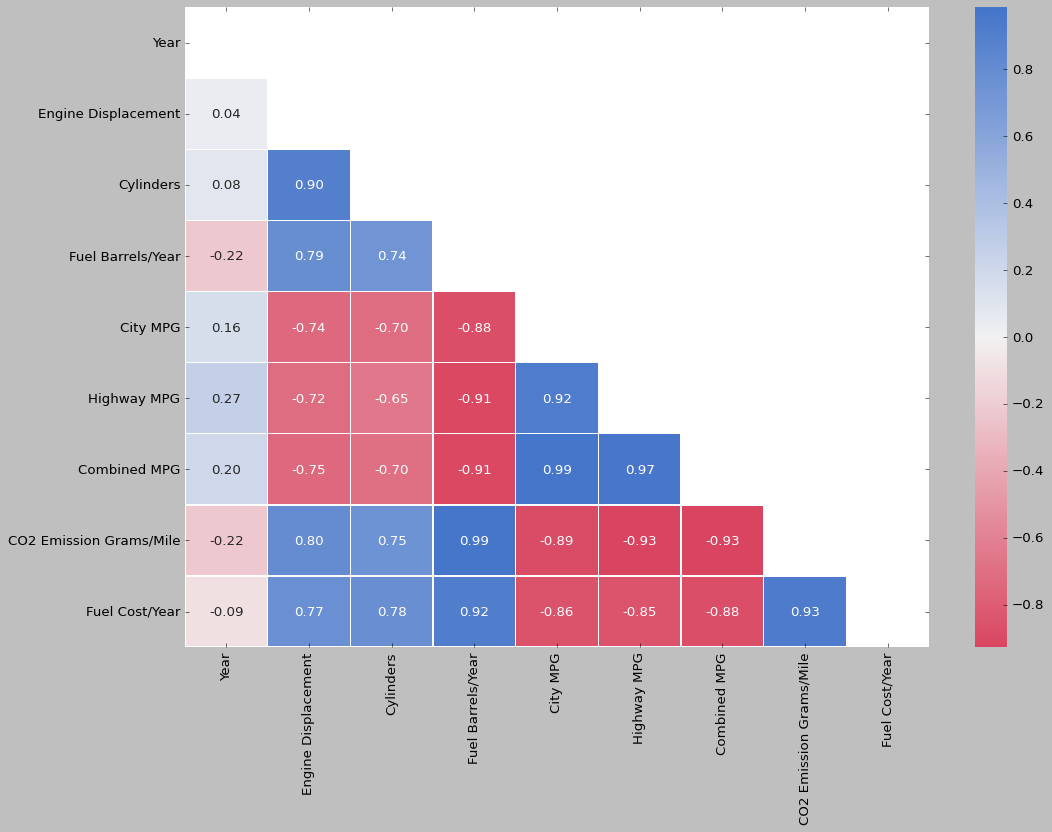

In [ ]:
correlation_plot(df.corr())